<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 7

### Problem 0 (3 points)

## Part 1: Decision Trees

In [1]:
import geometry as geo

In [2]:
import pickle
import numpy as np

with open('data.pkl', 'rb') as file:
    spirals = pickle.load(file)

x_train, y_train = tuple(zip(*spirals['train']))
x_train, y_train = np.array(x_train), np.array(y_train)

x_test, y_test = tuple(zip(*spirals['test']))
x_test, y_test = np.array(x_test), np.array(y_test)

label_colors = spirals['colors']
n_classes = len(spirals['colors'])

### Problem 1.1

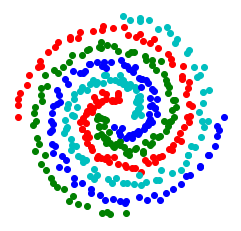

In [3]:
from matplotlib import pyplot as plt


for point in spirals['train']:
    plt.plot(point[0][0], point[0][1], label_colors[point[1]] + "o")

plt.gca().set_aspect(1)
plt.axis('off')
plt.show()


As seen, the training set above is not linearly separable. 

### Problem 1.2

The depth for tree best is 18
test accuracy for tree best: 92.92
The depth for tree random is 19
test accuracy for tree random: 90.18


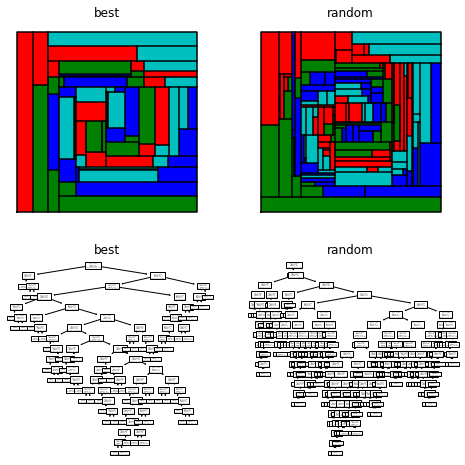

In [4]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_decision_regions(t, node_id, region, colors):
    left_id, right_id = t.children_left[node_id], t.children_right[node_id]
    if left_id == right_id:  # leaf node
        label = np.argmax(t.value[node_id])
        geo.plot_polygon(region, fill_color=colors[label])
        
    else:  # internal node
        if t.feature[node_id] == 0:
            w = geo.vector(1, 0)
        else:
            w = geo.vector(0, 1)
        
        line = geo.line(w, -1*t.threshold[node_id])
        cut = geo.cut_polygon(region, line)
        geo.plot_segment(cut.segment)
        plot_decision_regions(t, left_id, cut.negative, colors)
        plot_decision_regions(t, right_id, cut.positive, colors)
        
def print_diagram(split):
    clf = tree.DecisionTreeClassifier(splitter=split, random_state=0)
    clf.fit(x_train, y_train)
    t = clf.tree_
    region = geo.data_space()
    geo.plot_polygon(region, boundary_color='k')
    plot_decision_regions(t, 0, region, label_colors)

list = ['best', 'random']
plt.figure(figsize=(8, 8))
    
for i in range(2):
    sub = plt.subplot(2, 2, i+1)
    sub.axis('off')
    plt.title(list[i])
    print_diagram(list[i])
    plt.gca().set_aspect(1)
    
for i in range(2):
    clf = tree.DecisionTreeClassifier(splitter=list[i], random_state=0)
    clf.fit(x_train, y_train)
    print("The depth for tree {:s} is {}".format(list[i], clf.get_depth()))
    plt.subplot(2, 2, i+3)
    a = tree.plot_tree(clf)
    plt.title(list[i])
    plt.gca().set_aspect(1)
    print("test accuracy for tree {:s}: {:.2f}".format(list[i], 100* metrics.accuracy_score(y_test, clf.predict(x_test))))

plt.show()

### Problem 1.3 (Exam Style)

Based on the results of the code, the depths and accuracies are very similar; the best tree had depth of 18 while the random tree had a depth of 19. The test accuracy for tree best is 92.92% while the test accuracy for tree random is 90.18%.

In that way, the structure of the tree is not greatly affected by the policy, aside from the fact that the random has more branches. When dimensionality increases, for the best, it would take longer to train because it has to find the best option at each node but test is not affected because of the structure. For the random, it would take less time to train than the best since there is random selection and test time is not affected. The accuracy is not affected significantly because of policy.

## Part 2: Random Decision Forests 

### Problem 2.1

5 Trees has score 0.9825  and oob score 65.25
500 Trees has score 1.0  and oob score 90.25


Text(0.5, 0.98, 'Training Random Forest Classifier using 5 and 500 Trees')

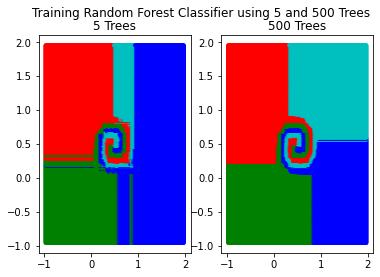

In [6]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
  
def coarse_regions(h, space, colors, step=0.01):
    estimators = np.array([5, 500])
    for index in range(len(estimators)):
        # Get the training set (from spirals)
        classifier = RandomForestClassifier(n_estimators=estimators[index], 
                                            max_depth=None, 
                                            min_samples_split=2, 
                                            random_state=0, 
                                            oob_score=True)
        X = x_train
        y = y_train
    
        #training random forest classifier (5 trees)
        classifier.fit(X, y)
    
        scores = classifier.score(X, y)
        warnings.catch_warnings()
        warnings.simplefilter('ignore')
        oob = classifier.oob_score_ * 100
        
        #Creating names for each subplot
        classifier_name = "{} Trees".format(estimators[index])
        myscores = " has score {} ".format(scores)
        myoob = " and oob score {}".format(oob)
        myoutput = "{}{}{}".format(classifier_name, myscores, myoob)
        print(myoutput)
    
        
        #Creating the subplots for the different forests
        plt.subplot(1, 2, index+1)
        plt.title(classifier_name)
        
        #Plotting the decision boundary 
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    
        color_map = ListedColormap(colors)  
        z_points = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        cs_points = plt.scatter(xx, yy, s = 15, c = z_points, cmap = color_map, edgecolors="none")
    
    
    
classifier = RandomForestClassifier(n_estimators=5)
coarse_regions(classifier, geo.data_space(), spirals['colors'])
plt.suptitle("Training Random Forest Classifier using 5 and 500 Trees")

### Problem 2.2 (Exam Style)

The OOB accuracy is low when 5 trees are used because there are less votes which leads to an answer that does not generalize well. The more trees that are added to a random forest the more votes there are to gain a better predictor for the model. The predictor is improved when there is a more holistic perception of the training set which is based on the having fewer elements having not been seen by any tree in the forest.

P, the probability a certain element has been seen by one tree in a forest, has been documented to follow $p = 1 - (1-.37)^m$, so as the number of trees in the forest increase, the probability of an element from the bag being seen has as well. This is why there is a significant OOB accuracy difference between the 5 tree and 500 tree classifier. The 5 tree classifier is more likely to have elements not seen during training. The OOB estimate for the 500 trees is a relatively good value because the higher the percentage the lower the OOB error rate. The OOB error is the average error for the each element calculated using predictions from the trees that do not include that element in their bag.

If the data space was expanded to be more than two dimensions, the efficiency of training the forest would need to be taken into account. The forest is d times more efficient since the splitting of the trees are done at random than methodically training a single tree. This information is important in understanding that this classifier can work well in higher dimensions. Moreover, the 500 tree classifier is still going to be more accurate than the 5 tree classifier.
